In [46]:
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [47]:
path= "Clean_CSV.csv"

In [48]:
# Mean. Median, Mode, Min, Max
# plt.savefig("../Images/CarDensity.png")

In [49]:
social_data= pd.read_csv(path)
social_data.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [50]:
# First Analysis Age vs Emotional Well being

analysis_1_df= social_data[["Age", "Dominant_Emotion"]]
analysis_1_df

,Age,Dominant_Emotion
0,25,Happiness
1,30,Anger
2,22,Neutral
3,28,Anxiety
4,33,Boredom
...,...,...
919,33,Boredom
920,22,Neutral
921,35,Happiness
922,28,Anger


In [51]:
median_age = analysis_1_df["Age"].median()
median_age

27.0

In [52]:
analysis_1_df["Age"].describe()

count    924.000000
mean      27.500000
std        3.941473
min       21.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       35.000000
Name: Age, dtype: float64

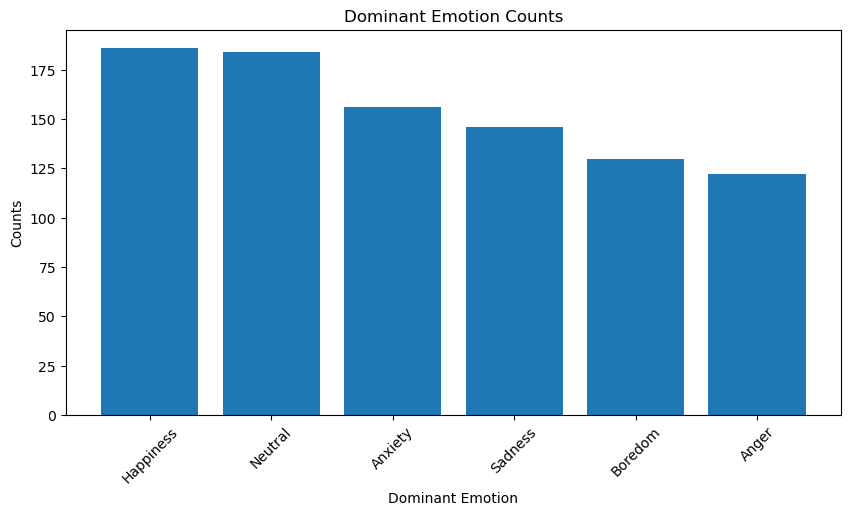

In [53]:
emotion_counts = analysis_1_df['Dominant_Emotion'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(emotion_counts.index, emotion_counts.values)
plt.title('Dominant Emotion Counts')
plt.xlabel('Dominant Emotion')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.savefig("../Data/Emotion_Count.png")
plt.show()



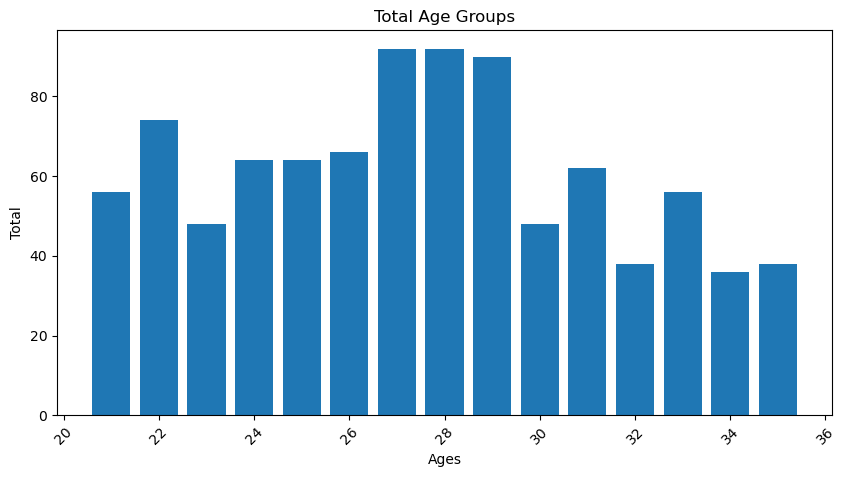

In [54]:
age_counts = analysis_1_df['Age'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 5))
plt.bar(age_counts.index, age_counts.values)
plt.title('Total Age Groups')
plt.xlabel('Ages')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.savefig("../Data/Total_Age_Groups.png")
plt.show()

In [55]:
happiness_df = analysis_1_df[analysis_1_df['Dominant_Emotion'] == 'Happiness']
happiness_df.value_counts()


Age  Dominant_Emotion
25   Happiness           40
28   Happiness           26
33   Happiness           20
30   Happiness           18
32   Happiness           18
24   Happiness           16
21   Happiness           10
22   Happiness           10
31   Happiness           10
35   Happiness           10
27   Happiness            8
Name: count, dtype: int64

In [56]:
anger_df = analysis_1_df[analysis_1_df['Dominant_Emotion'] == 'Anger']
anger_df.value_counts()

Age  Dominant_Emotion
27   Anger               20
28   Anger               20
30   Anger               20
24   Anger               18
29   Anger               18
32   Anger               10
23   Anger                8
34   Anger                8
Name: count, dtype: int64

In [57]:
age_group_df = analysis_1_df[analysis_1_df['Age'] == 27]
age_group_df.value_counts()

Age  Dominant_Emotion
27   Anger               20
     Anxiety             18
     Boredom             18
     Neutral             18
     Sadness             10
     Happiness            8
Name: count, dtype: int64

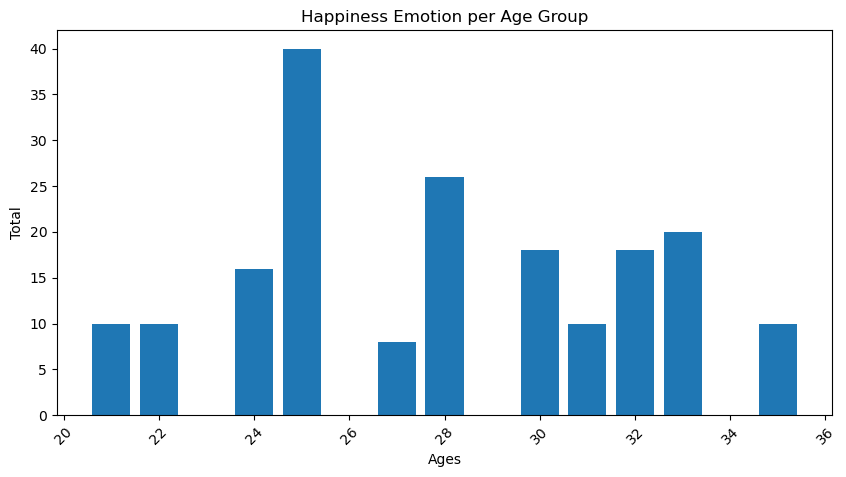

In [58]:
happy_counts = happiness_df['Age'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 5))
plt.bar(happy_counts.index, happy_counts.values)
plt.title('Happiness Emotion per Age Group')
plt.xlabel('Ages')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.savefig("../Data/Happiness_Per_Age.png")
plt.show()

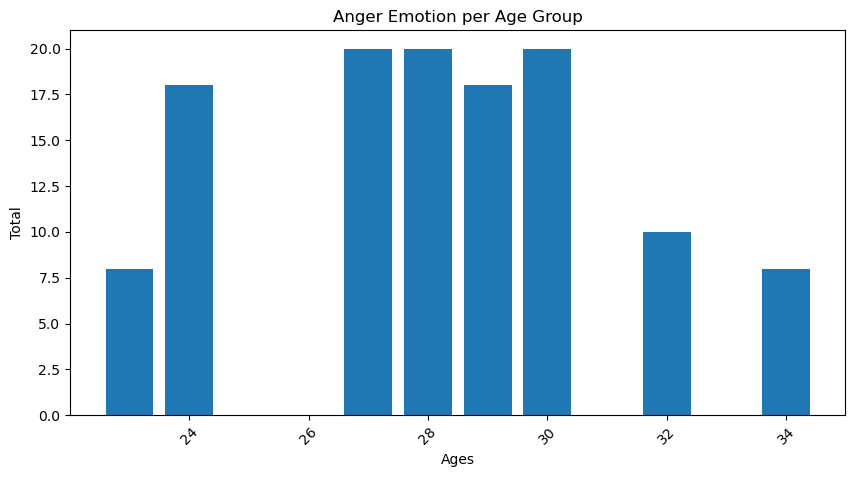

In [59]:
anger_counts = anger_df['Age'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 5))
plt.bar(anger_counts.index, anger_counts.values)
plt.title('Anger Emotion per Age Group')
plt.xlabel('Ages')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.savefig("../Data/Anger_Per_Age.png")
plt.show()

In [60]:
# Second Anaylsis Gender vs Minutes Spent vs well being

analysis_2_df= social_data[["Gender", "Daily_Usage_Time (minutes)", "Dominant_Emotion"]]
analysis_2_df

,Gender,Daily_Usage_Time (minutes),Dominant_Emotion
0,Female,120.0,Happiness
1,Male,90.0,Anger
2,Non-binary,60.0,Neutral
3,Female,200.0,Anxiety
4,Male,45.0,Boredom
...,...,...,...
919,Non-binary,85.0,Boredom
920,Female,70.0,Neutral
921,Male,110.0,Happiness
922,Non-binary,60.0,Anger


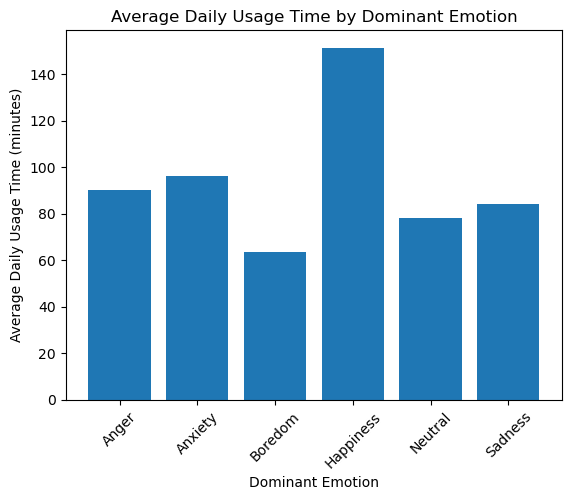

In [61]:
# Group by 'Dominant_Emotion' and calculate the mean daily usage time
emotion_usage = analysis_2_df.groupby('Dominant_Emotion')['Daily_Usage_Time (minutes)'].mean()

# Create a bar chart using Matplotlib
plt.bar(emotion_usage.index, emotion_usage.values)
plt.title('Average Daily Usage Time by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Average Daily Usage Time (minutes)')
plt.xticks(rotation=45)
plt.show()

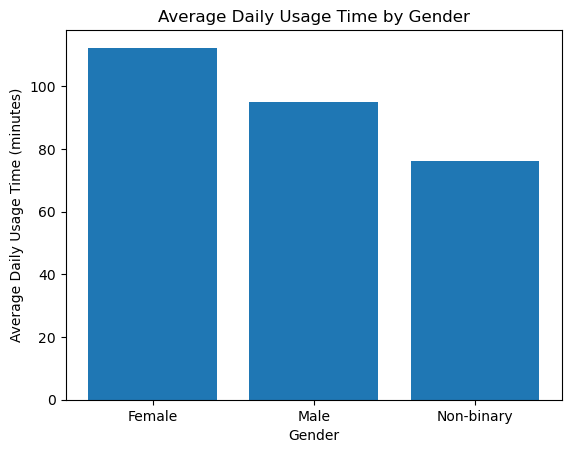

In [62]:
# Group by 'Gender' and calculate the mean daily usage time
gender_usage = analysis_2_df.groupby('Gender')['Daily_Usage_Time (minutes)'].mean()

# Create a bar chart using Matplotlib
plt.bar(gender_usage.index, gender_usage.values)
plt.title('Average Daily Usage Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Daily Usage Time (minutes)')
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels if needed
plt.show()

In [63]:
male_df = analysis_2_df[analysis_2_df['Gender'] == 'Male']
male_df

,Gender,Daily_Usage_Time (minutes),Dominant_Emotion
1,Male,90.0,Anger
4,Male,45.0,Boredom
5,Male,150.0,Happiness
9,Male,170.0,Happiness
12,Male,65.0,Boredom
...,...,...,...
910,Male,85.0,Sadness
913,Male,70.0,Anxiety
916,Male,75.0,Neutral
918,Male,150.0,Anxiety


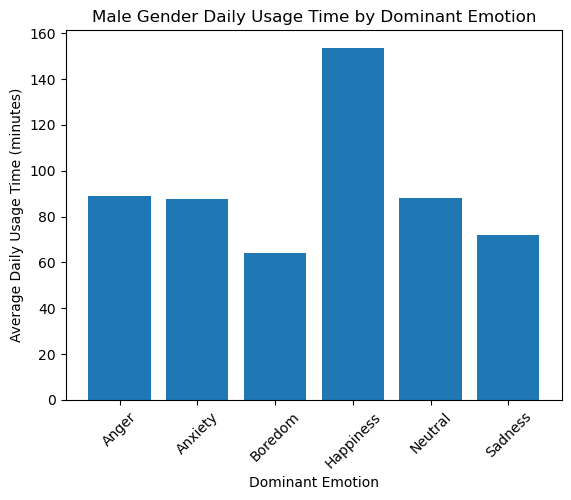

In [64]:
# Group by 'Dominant_Emotion' and calculate the mean daily usage time for males
male_usage = male_df.groupby('Dominant_Emotion')['Daily_Usage_Time (minutes)'].mean()

# Created a bar chart using Matplotlib
plt.bar(male_usage.index, male_usage.values)
plt.title('Male Gender Daily Usage Time by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Average Daily Usage Time (minutes)')
plt.xticks(rotation=45)
plt.show()

In [65]:
#min_spent_male= male_df["Daily_Usage_Time (minutes)"].median()
#min_spent_male

In [66]:
#male_df["Daily_Usage_Time (minutes)"].describe()

In [67]:
female_df = analysis_2_df[analysis_2_df['Gender'] == 'Female']
female_df

,Gender,Daily_Usage_Time (minutes),Dominant_Emotion
0,Female,120.0,Happiness
3,Female,200.0,Anxiety
6,Female,85.0,Anger
8,Female,55.0,Neutral
10,Female,75.0,Anxiety
...,...,...,...
912,Female,170.0,Happiness
915,Female,105.0,Anger
917,Female,95.0,Sadness
920,Female,70.0,Neutral


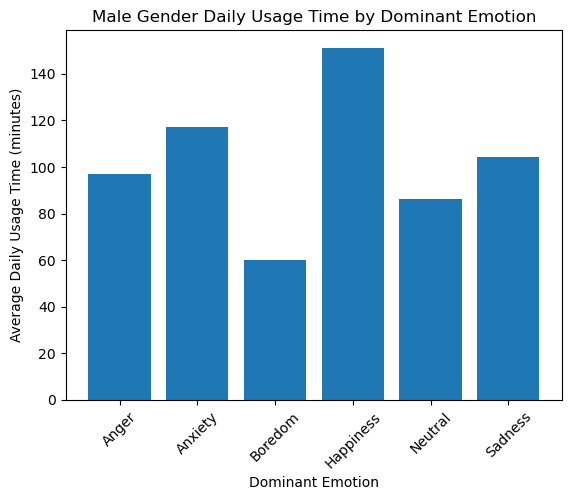

In [68]:
# Group by 'Dominant_Emotion' and calculate the mean daily usage time for males
female_usage = female_df.groupby('Dominant_Emotion')['Daily_Usage_Time (minutes)'].mean()

# Created a bar chart using Matplotlib
plt.bar(female_usage.index, female_usage.values)
plt.title('Male Gender Daily Usage Time by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Average Daily Usage Time (minutes)')
plt.xticks(rotation=45)
plt.show()

In [69]:
#min_spent_female= female_df["Daily_Usage_Time (minutes)"].median()
#min_spent_female

In [70]:
#female_df["Daily_Usage_Time (minutes)"].describe()

In [71]:
non_binary_df = analysis_2_df[analysis_2_df['Gender'] == 'Non-binary']
non_binary_df

,Gender,Daily_Usage_Time (minutes),Dominant_Emotion
2,Non-binary,60.0,Neutral
7,Non-binary,110.0,Sadness
11,Non-binary,95.0,Sadness
15,Non-binary,40.0,Neutral
18,Non-binary,50.0,Neutral
...,...,...,...
908,Non-binary,75.0,Boredom
911,Non-binary,60.0,Neutral
914,Non-binary,50.0,Boredom
919,Non-binary,85.0,Boredom


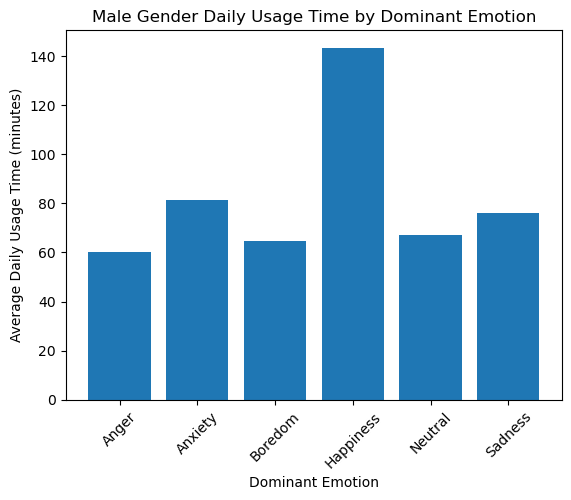

In [72]:
# Group by 'Dominant_Emotion' and calculate the mean daily usage time for males
nb_usage = non_binary_df.groupby('Dominant_Emotion')['Daily_Usage_Time (minutes)'].mean()

# Created a bar chart using Matplotlib
plt.bar(nb_usage.index, nb_usage.values)
plt.title('Male Gender Daily Usage Time by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Average Daily Usage Time (minutes)')
plt.xticks(rotation=45)
plt.show()

In [73]:
#min_spent_nb= non_binary_df["Daily_Usage_Time (minutes)"].median()
#min_spent_nb

In [74]:
#non_binary_df["Daily_Usage_Time (minutes)"].describe()

In [75]:
# Third Analysis Posts, likes, comments and messages vs emotional well being

analysis_3_df = social_data[["Posts_Per_Day", "Likes_Received_Per_Day", 
                             "Comments_Received_Per_Day", "Messages_Sent_Per_Day", "Dominant_Emotion"]]
analysis_3_df

,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,3.0,45.0,10.0,12.0,Happiness
1,5.0,20.0,25.0,30.0,Anger
2,2.0,15.0,5.0,20.0,Neutral
3,8.0,100.0,30.0,50.0,Anxiety
4,1.0,5.0,2.0,10.0,Boredom
...,...,...,...,...,...
919,4.0,35.0,18.0,18.0,Boredom
920,1.0,14.0,6.0,10.0,Neutral
921,3.0,50.0,25.0,25.0,Happiness
922,2.0,18.0,8.0,18.0,Anger
